#### Os dados, até a data do presente estudo, estão no https://covid.saude.gov.br/
#### O presente arquivo é de 17 de maio. Atenção: de acordo com o dia em que for feita a análise, a última barra da totalização por semana estará menor.
#### Disclaimer/Aviso Legal: Este notebook tem um fim única e exclusivamente didático, para alunos da FATEC, como uma introdução à Análise de Dados Públicos. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informações.

In [1]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'C:\Users\fmasa\Downloads\HIST_PAINEL_COVIDBR_17mai2021.csv'
df = pd.read_csv(filename, delimiter=';',
                 error_bad_lines=False)

In [3]:
df.shape

(2343993, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343993 entries, 0 to 2343992
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   regiao                  object 
 1   estado                  object 
 2   municipio               object 
 3   coduf                   int64  
 4   codmun                  float64
 5   codRegiaoSaude          float64
 6   nomeRegiaoSaude         object 
 7   data                    object 
 8   semanaEpi               int64  
 9   populacaoTCU2019        float64
 10  casosAcumulado          float64
 11  casosNovos              int64  
 12  obitosAcumulado         int64  
 13  obitosNovos             int64  
 14  Recuperadosnovos        float64
 15  emAcompanhamentoNovos   float64
 16  interior/metropolitana  float64
dtypes: float64(7), int64(5), object(5)
memory usage: 304.0+ MB


In [5]:
df.sample(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1347521,Sudeste,RJ,Cabo Frio,33,330070.0,33002.0,BAIXADA LITORANEA,2020-09-01,36,226525.0,2060.0,47,118,1,NaN,NaN,0.0
617939,Nordeste,PB,Serra da Raiz,25,251560.0,25002.0,2ª REGIAO,2021-02-16,7,3148.0,164.0,0,1,0,NaN,NaN,0.0
1404009,Sudeste,SP,Balbinos,35,350470.0,35062.0,BAURU,2021-03-13,10,5735.0,277.0,0,3,0,NaN,NaN,0.0
537033,Nordeste,PB,Alhandra,25,250060.0,25001.0,1ª REGIAO MATA ATLANTICA,2021-02-08,6,19588.0,844.0,3,20,0,NaN,NaN,1.0
178518,Norte,TO,Novo Acordo,17,171510.0,17006.0,CAPIM DOURADO,2020-04-02,14,4342.0,0.0,0,0,0,NaN,NaN,0.0
540793,Nordeste,PB,Areial,25,250120.0,25003.0,3ª REGIAO,2021-02-15,7,6998.0,153.0,1,5,0,NaN,NaN,0.0
1163807,Sudeste,MG,Morro da Garça,31,314360.0,31019.0,CURVELO,2021-03-03,9,2462.0,47.0,5,3,0,NaN,NaN,0.0
302573,Nordeste,PI,Bela Vista do Piauí,22,220155.0,22008.0,VALE DO CANINDE,2020-10-25,44,4015.0,44.0,0,1,0,NaN,NaN,0.0
2138932,Sul,RS,Vacaria,43,432250.0,43024.0,REGIAO 24,2020-07-08,28,66218.0,149.0,3,7,0,NaN,NaN,0.0
1263176,Sudeste,MG,São José do Alegre,31,316320.0,31003.0,ITAJUBA,2020-05-13,20,4196.0,0.0,0,0,0,NaN,NaN,0.0


In [6]:
df.groupby('estado')['obitosAcumulado'].max().sort_values(ascending=False)

estado
SP    104295
RJ     48024
MG     37557
RS     26724
PR     24702
BA     19972
CE     19123
GO     16114
PE     14980
SC     14465
PA     13961
AM     12855
MT     10289
ES     10259
DF      8345
MA      7727
PB      7248
MS      6230
RN      5835
PI      5537
RO      5501
SE      4746
AL      4508
TO      2727
AP      1622
AC      1620
RR      1571
Name: obitosAcumulado, dtype: int64

<AxesSubplot:ylabel='estado'>

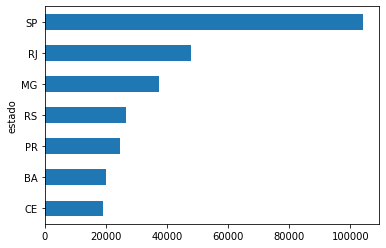

In [7]:
df.groupby('estado')['obitosAcumulado'].max().sort_values().tail(7).plot(kind='barh')

<AxesSubplot:xlabel='data'>

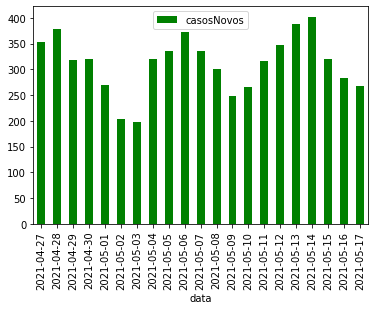

In [8]:
sjc = df.query('municipio == "São José dos Campos"')
sjc.tail(21).plot(kind='bar', 
        x='data', y='casosNovos', color='GREEN')

<AxesSubplot:xlabel='semanaEpi'>

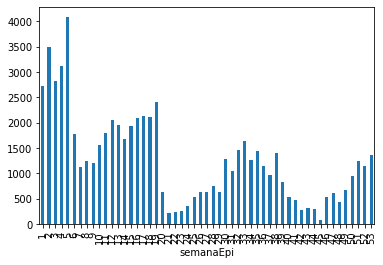

In [9]:
sjc.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')

<AxesSubplot:xlabel='data'>

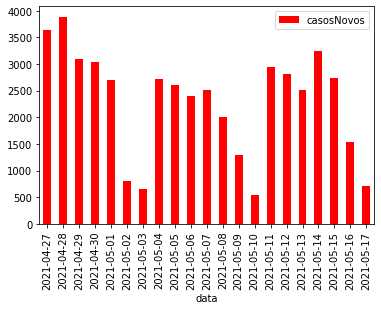

In [10]:
sp = df.query('municipio == "São Paulo"')
sp.tail(21).plot(kind='bar', 
        x='data', y='casosNovos', color='RED')

<AxesSubplot:xlabel='semanaEpi'>

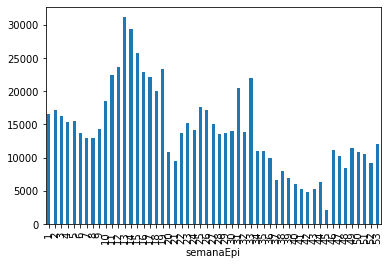

In [11]:
sp.groupby('semanaEpi')['casosNovos'].sum().plot(kind='bar')